# Лабораторная работа №5. Основы спектрального анализа.

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as plt
import soundfile as sf
import scipy
plt.rcParams.update({'font.size': 14})

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

In [3]:
#%matplotlib inline

In [4]:
#%matplotlib notebook

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга |
| $w_3[k]$ | Блэкмана | Блэкмана | Блэкмана | Блэкмана | Блэкмана | Блэкмана |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ). 
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного. 

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа? 


/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


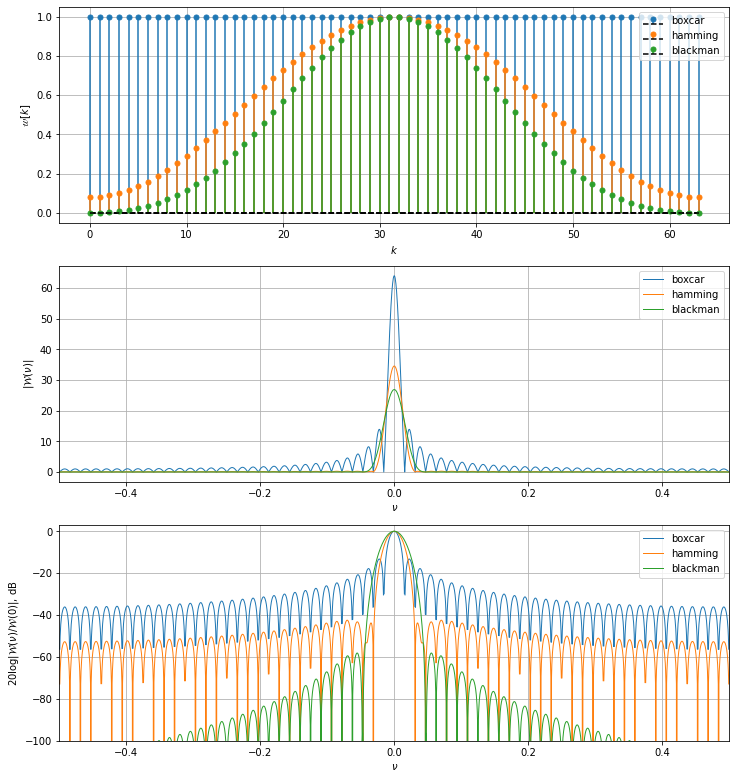

In [3]:
N = 64
M = 2048

plt.figure(figsize = (12, 13.5))
plt.subplot(3, 1, 1)
for i, window in enumerate(['boxcar','hamming', 'blackman']):
    w = signal.get_window(window = window, Nx = N, fftbins = False)
    ml, sl, bl = plt.stem(np.arange(N), w, 'C%d'%i, basefmt = 'k--', markerfmt = 'o' + 'C%d'%i, 
                          label=window, use_line_collection=True)
    plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel("$\mathscr{w}[k]$")
plt.xlabel('$k$')
    
plt.subplot(3, 1, 2)
for i, window in enumerate(['boxcar', 'hamming', 'blackman']):
    nu, W = DTFT(x=signal.get_window(window = window, Nx = N, fftbins = True), M=M)
    plt.plot(nu, abs(W), lw = 1, label = window)
plt.legend(loc = 'upper right')
plt.ylabel('$|\mathcal{W}(\\nu)|$')
plt.xlabel('$\\nu$')
plt.xlim(-0.5, 0.5)
plt.grid()


plt.subplot(3, 1, 3)
for i, window in enumerate(['boxcar', 'hamming', 'blackman']):
    nu, W = DTFT(x=signal.get_window(window = window, Nx = N, fftbins = True), M=M)
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))), lw = 1, label = window)
plt.legend(loc = 'upper right')
plt.ylabel('$20 \log |\mathcal{W}(\\nu) / \mathcal{W}(0)|$, dB')
plt.xlabel('$\\nu$')
plt.xlim(-0.5, 0.5)
plt.ylim(-100, 3)
plt.grid()
plt.show()

In [ ]:
fig = go.Figure()
for i, window in enumerate(['boxcar', 'hamming', 'blackman']):
    nu, W = DTFT(x=signal.get_window(window = window, Nx = N, fftbins = True), M=M)
    fig.add_trace(go.Scatter(x=nu, y=20*np.log10(abs(W)/max(abs(W))),
                    mode = 'lines', line = dict(dash='solid'), name = f'{window}'))
    
fig.update_yaxes(title_text="20 log(|W(nu)/W(0)|), dB")
fig.update_xaxes(title_text="nu")
fig.update_yaxes(range=[-80, 3])
fig.update_xaxes(showspikes=True, spikecolor="red", spikethickness=2)
fig.update_yaxes(showspikes=True, spikecolor="red", spikesnap="cursor", spikemode="across", spikethickness=2)

fig.update_layout(height=800, width=1500,)
fig.update_layout(hoverlabel_namelength=-1)
fig.write_html('lab5_pics/task11.html')
fig.show()

|                                      | boxcar	  | hamming  | blackman |
|--------------------------------------|          |          |          |
| $\Delta \nu_0 N$          	   |  1.94  |  3.94  | 5.98 |
| $\Delta \nu_{-3\text{ dB}}N$   |  0.88  |  1.41  | 1.62   |
| $\Delta \nu_{-6\text{ dB}}N$   |  1.20  |  1.81  | 2.29   |
| side level, dB 	                   |  -13.3   |  -42.5   | -58.1    |

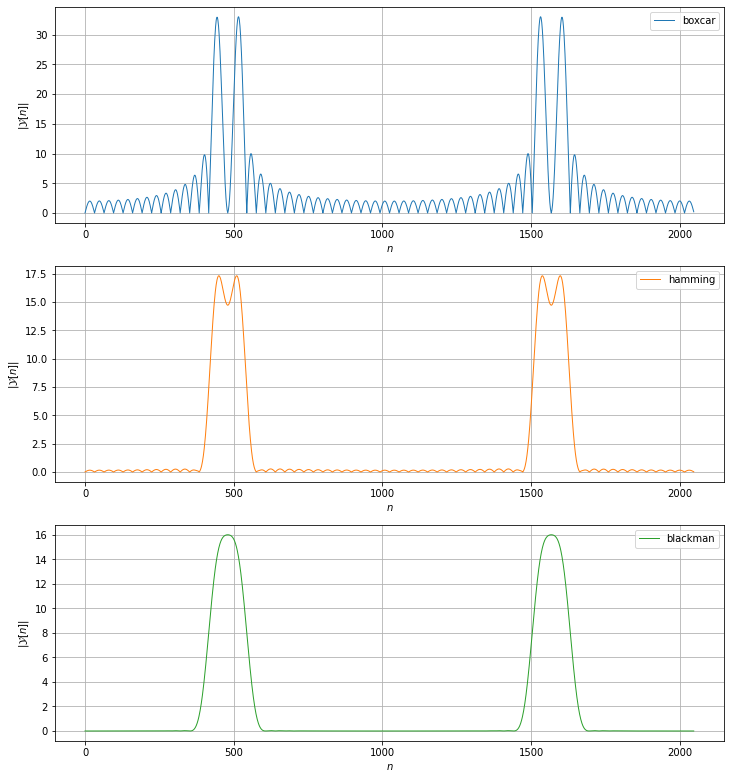

In [4]:
n0 = 16
k = np.arange(N)
x = np.cos(2*np.pi*n0/N*k) + np.cos(2*np.pi*(n0+2)/N*k)

plt.figure(figsize = (12, 13.5))
for i, window in enumerate(['boxcar', 'hamming', 'blackman']):
    plt.subplot(3, 1, i+1)
    w = signal.get_window(window = window, Nx = N, fftbins = True)
    y = x*w
    nu, W = DTFT(y, M=M)
    plt.plot(np.arange(M), abs(W), 'C%d'%i, lw = 1, label = window)
    plt.legend(loc = 'upper right')
    plt.ylabel('$|\mathcal{Y}[n]|$')
    plt.xlabel('$n$')
    plt.grid()
    
plt.show()

## Задача 1.2*. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |

Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи). Вычислить 2048-точечное ДПФ для $x[k]$, используя 
* а) матричную форму ДПФ, 
* б) быстрое преобразование Фурье. 

Сравнить результаты. 

Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$. 

---

**Алгоритм Герцеля**

1) Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2) Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



In [5]:
N = 2048
x, fs = sf.read('./dataset/xylophone1.wav')
x = x[:N, 0]

def w(n, k=1, N=N):
    return np.exp(-2j*np.pi*n*k/N)

for n in np.random.randint(low=0, high=N, size=3):
    W = scipy.linalg.dft(N)
    y1 = W @ x
    
    beta=np.array([w(n=-n, k=1, N=N), -1.0], dtype=complex)
    alpha=np.array([1.0, -2.0*np.cos(2*np.pi*n/N), 1.0], dtype=complex)
    y2 = signal.lfilter(beta, alpha, x)
    
    print(n, np.allclose(y1[n], y2[N-1]))

48 True
791 True
731 True


# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени ($\Delta t = (M-L)/f_s$) и какое по частоте ($\Delta f = f_s/N_{\text{FFT}}$) для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










In [6]:
x, fs = sf.read('./dataset/xylophone1.wav')
x = x[:, 0]

/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log10



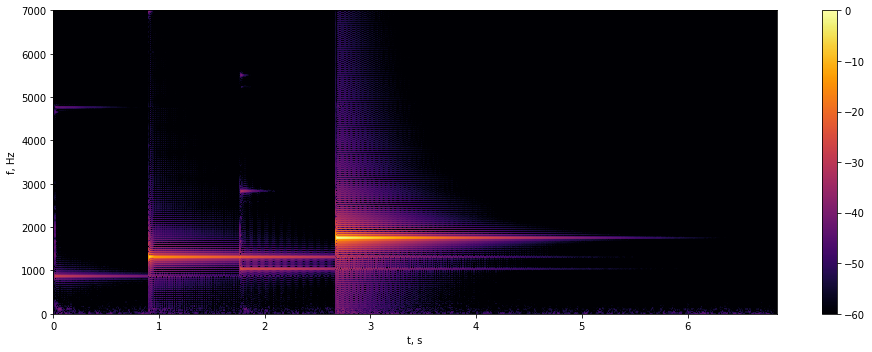

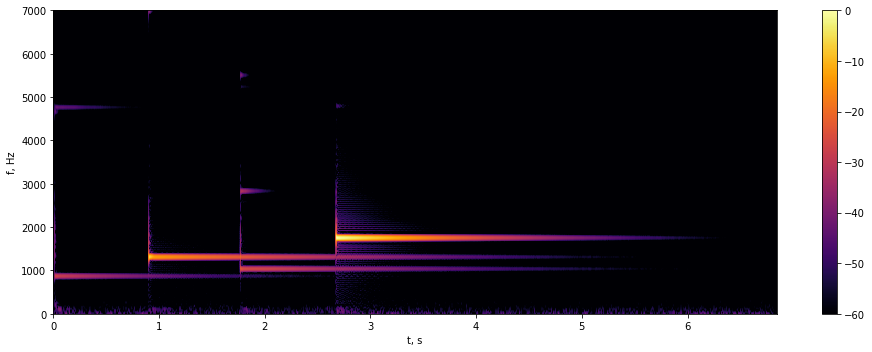

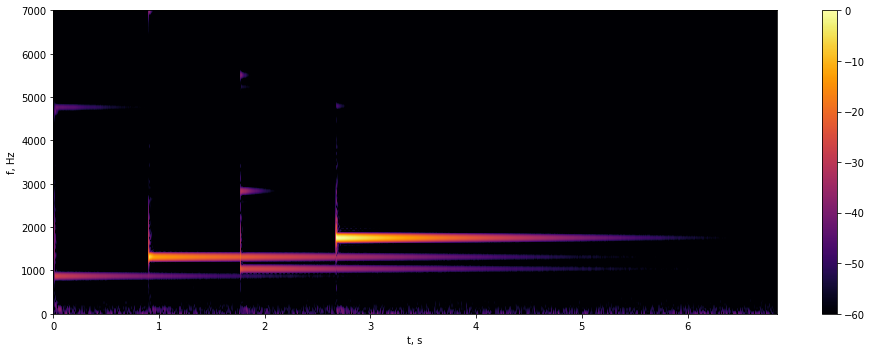

In [10]:
windows=['boxcar', 'hamming', 'blackman']
for window in windows:
    nperseg=1000
    noverlap=nperseg//2
    plt.figure(figsize=[13.5, 5], num='window   =   %s' % (window))
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 7000))
    plt.ylabel('f, Hz')
    plt.xlabel('t, s')
    plt.tight_layout()
plt.show()

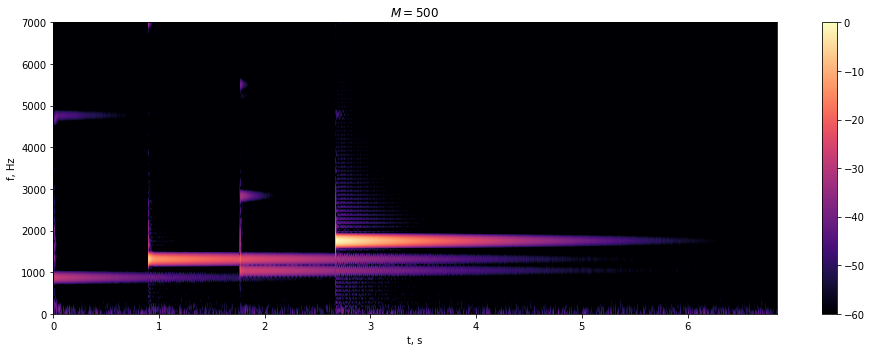

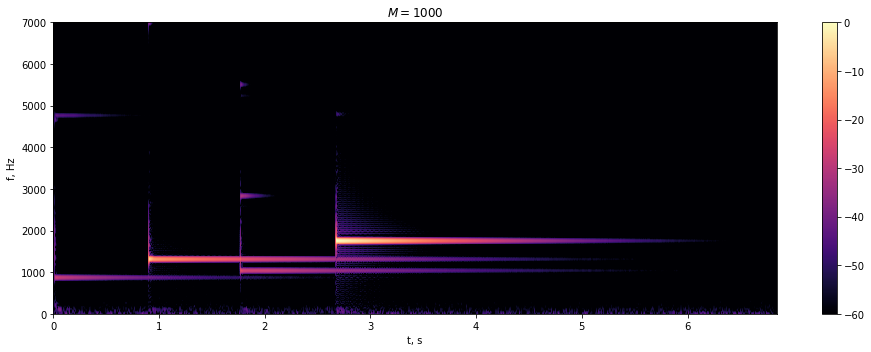

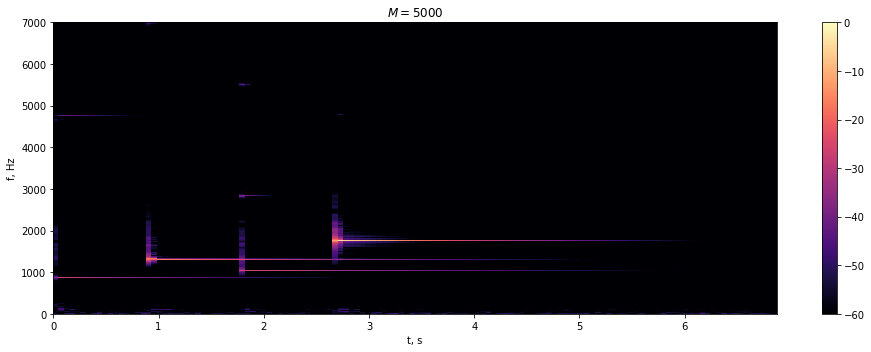

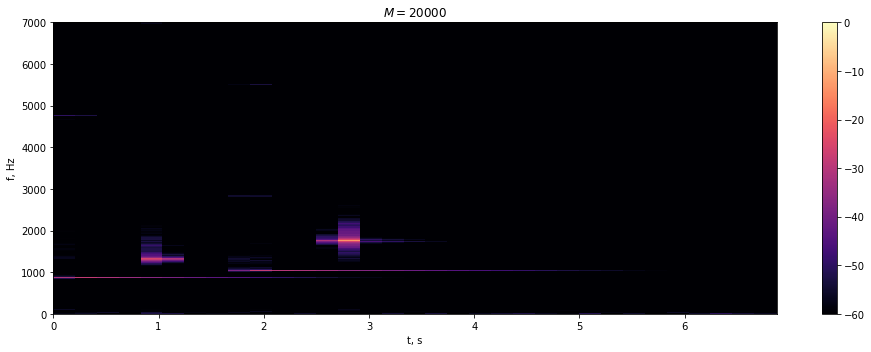

In [7]:
for nperseg in [500, 1000, 5000, 20000]:
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('hamming'), nperseg=nperseg, noverlap=noverlap, nfft=max(2**14, nperseg))
    plt.figure(figsize=[13.5, 5], num='R = %i' % (nperseg-noverlap))
    plt.title('$M = $%i' % nperseg)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('magma'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 7000))
    plt.ylabel('f, Hz')
    plt.xlabel('t, s')
    plt.tight_layout()
plt.show()

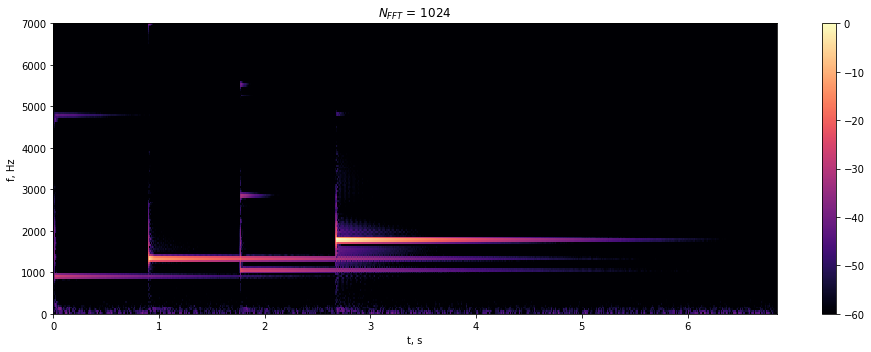

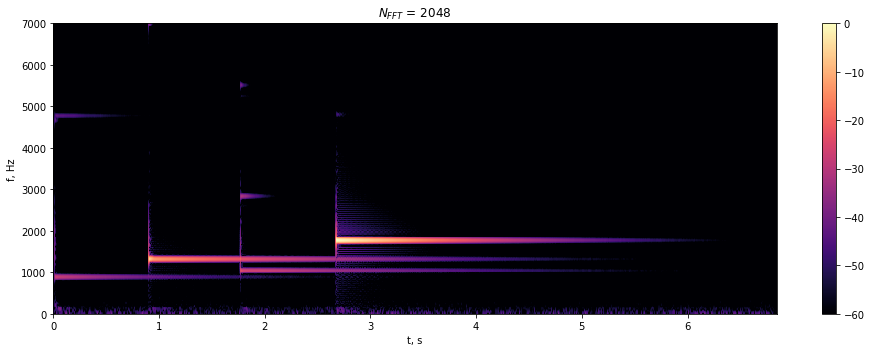

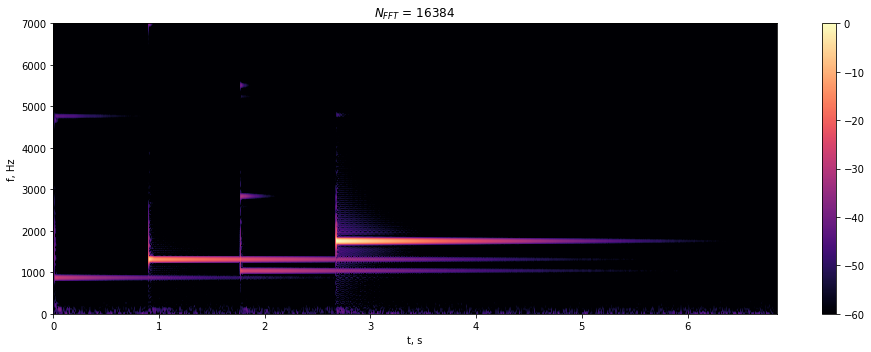

In [8]:
for nfft in [1024, 2048, 2**14]:
    nperseg=1000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('hamming'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    plt.figure(figsize=[13.5, 5], num='nfft = %i' % (nfft))
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('magma'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 7000))
    plt.ylabel('f, Hz')
    plt.xlabel('t, s')
    plt.tight_layout()
plt.show()

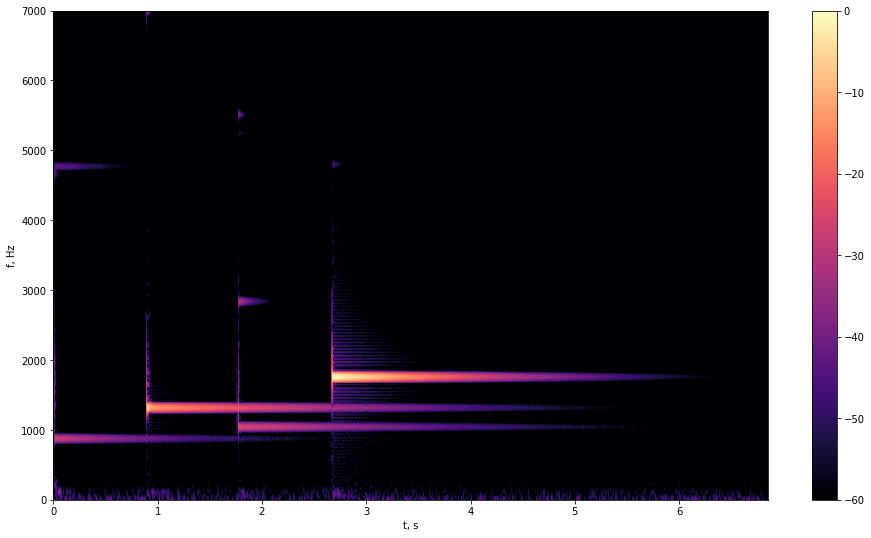

In [9]:
plt.figure(figsize=(16, 9))
nperseg=1024
noverlap=nperseg//2
f, t, Zxx = signal.stft(x, fs=fs, window=('hamming'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('magma'), shading='flat')
plt.colorbar()
plt.ylim((0, 7000))
plt.ylabel('f, Hz')
plt.xlabel('t, s')
plt.show()

#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy|

По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае? 

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`). 

In [10]:
x = np.load('./dataset/variant_2_ex_2_1.npy')
fs = 16_000
x.imag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

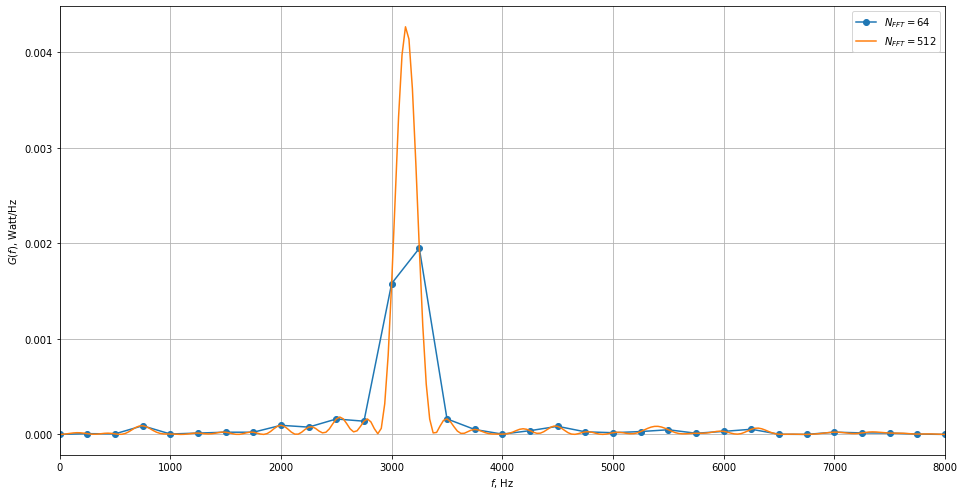

In [11]:
plt.figure(figsize=(13.5, 7))

nfft=x.size
f2, Pxx_den2 = signal.periodogram(x, fs=fs, nfft=nfft, scaling='density')
plt.plot(f2, Pxx_den2/2, 'C0-o', label = "$N_{FFT} = %i$" %nfft)

nfft=8*x.size
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=nfft, scaling='density')
plt.plot(f, Pxx_den/2, 'C1-', label = "$N_{FFT} = %i$" %nfft)

plt.legend()
plt.xlim([0, fs/2])
plt.grid()
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()

## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

In [12]:
a1 = 5.
fs = 16_000
f0 = 2_000
sigma = 20.
M = 40.

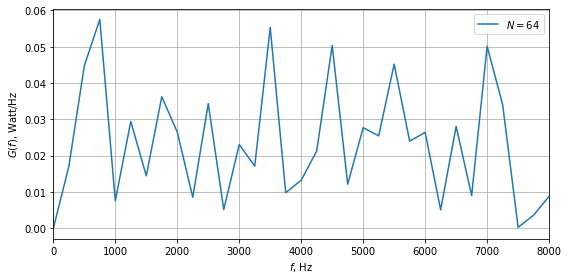

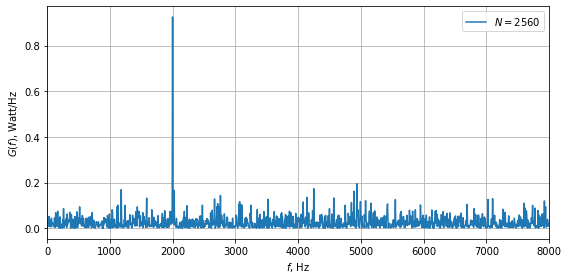

In [13]:
N = 64
x = a1*np.sin(2*np.pi*f0/fs*np.arange(N)) + np.random.normal(scale=sigma, size=N)
plt.figure(figsize=(8, 4))
f2, Pxx_den2 = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.plot(f2, Pxx_den2/2,label = "$N = %i$" %N)

plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()

plt.figure(figsize=(8, 4))
N = int(M * 4*sigma**2 / a1**2)
x = a1*np.sin(2*np.pi*f0/fs*np.arange(N)) + np.random.normal(scale=sigma, size=N)
f2, Pxx_den2 = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.plot(f2, Pxx_den2/2, label = "$N = %i$" %N)

plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()
plt.show()

#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy|

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты. 

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид 
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


In [14]:
x = np.load('./dataset/variant_2_ex_3_1.npy')
fs = 16_000
x.imag

array([0., 0., 0., ..., 0., 0., 0.])

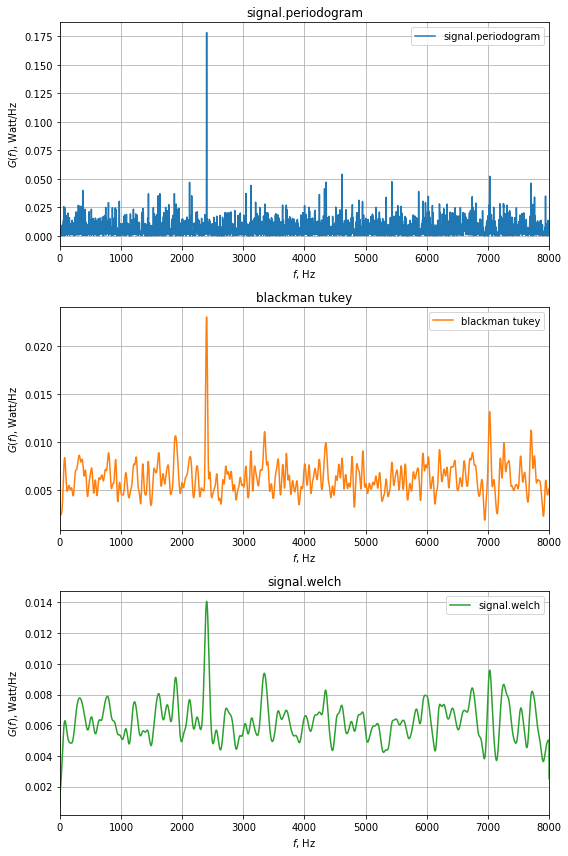

2400.390625


In [15]:
def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / len(x)
    lag = np.arange(-(len(x)-1), len(x))
    return Rx[np.logical_and(lag<=N1-1, lag>=0)]

def blackman_tukey_estimator(x, window='bartlett', Nfft=2**12, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

plt.figure(figsize=(8, 12))
plt.subplot(311)
N = 2*x.size
f2, Pxx_den2 = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.plot(f2, Pxx_den2/2, label = "signal.periodogram")

plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.title('signal.periodogram')
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()

f, P_BT = blackman_tukey_estimator(x, window='bartlett', Nfft=2*N, fs=fs)
plt.subplot(312)
plt.plot(f, P_BT, 'C1', label = "blackman tukey")
plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.title('blackman tukey')
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()

plt.subplot(313)
f, Pxx = signal.welch(x, fs, window='bartlett', nfft=2*N)
plt.plot(f, Pxx/2, 'C2', label = "signal.welch")
plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.title('signal.welch')
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()
plt.show()

print(f2[np.argmax(Pxx_den2)])

## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 3.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 3.1. 

In [16]:
def auto_correlation(x, N1, mode='biased'):
    if mode == 'biased':
        Rx = signal.correlate(x, x) / len(x)
        lag = np.arange(-(len(x)-1), len(x))
        return Rx[np.logical_and(lag<=N1-1, lag>=0)]
    else:
        Rx = signal.correlate(x, x) * 1./(x.size - abs(np.arange(-x.size+1, +x.size)))
        lag = np.arange(-(len(x)-1), len(x))
        return Rx[np.logical_and(lag<=N1-1, lag>=0)]

def blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

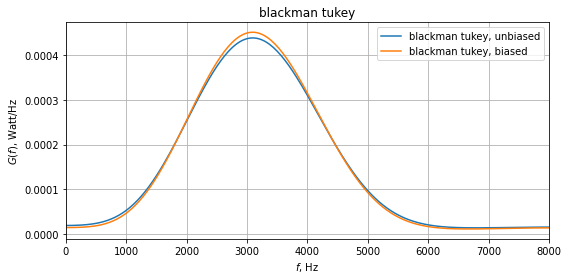

In [17]:
x = np.load('./dataset/variant_2_ex_2_1.npy')
fs = 16_000

plt.figure(figsize=(8, 4))
f, P_BT = blackman_tukey_estimator(x, window='hamming', Nfft=8*x.size, fs=fs, auto_correlation_mode='biased',)
plt.plot(f, P_BT, label = "blackman tukey, unbiased")

f, P_BT = blackman_tukey_estimator(x, window='hamming', Nfft=8*x.size, fs=fs, auto_correlation_mode='unbiased',)
plt.plot(f, P_BT, label = "blackman tukey, biased")

plt.legend(loc='upper right')
plt.xlim([0, fs/2])
plt.grid()
plt.title('blackman tukey')
plt.xlabel('$f$, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.tight_layout()
plt.show()

## Задача 4.3. Оценка кросс-спектральной плотности мощности 

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy|

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы. 

In [18]:
x, y = np.load('./dataset/variant_2_ex_3_3.npy')
N = x.size

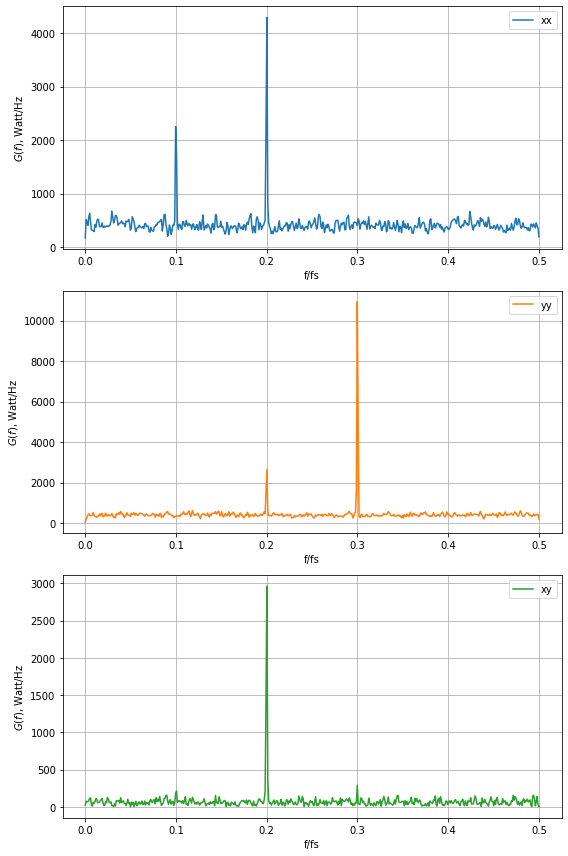

In [19]:
plt.figure(figsize=(8, 12))

f, Pxx = signal.csd(x, x, 1, nperseg=x.size//16)
plt.subplot(311)
plt.plot(f, abs(Pxx)/2, 'C0', label = 'xx')
plt.xlabel('f/fs')
plt.ylabel('$G(f)$, Watt/Hz')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()

f, Pyy = signal.csd(y, y, 1, nperseg=x.size//16)
plt.subplot(312)
plt.plot(f, abs(Pyy)/2, 'C1', label = 'yy')
plt.xlabel('f/fs')
plt.ylabel('$G(f)$, Watt/Hz')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()

f, Pxy = signal.csd(x, y, 1, nperseg=x.size//16)
plt.subplot(313)
plt.plot(f, abs(Pxy)/2, 'C2', label = 'xy')
plt.xlabel('f/fs')
plt.ylabel('$G(f)$, Watt/Hz')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Задача 4.4. Периодограмма Ломба-Скаргла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy|

Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`). 

In [20]:
x, t = np.load('./dataset/variant_2_ex_3_4.npy')
fs = 16_000

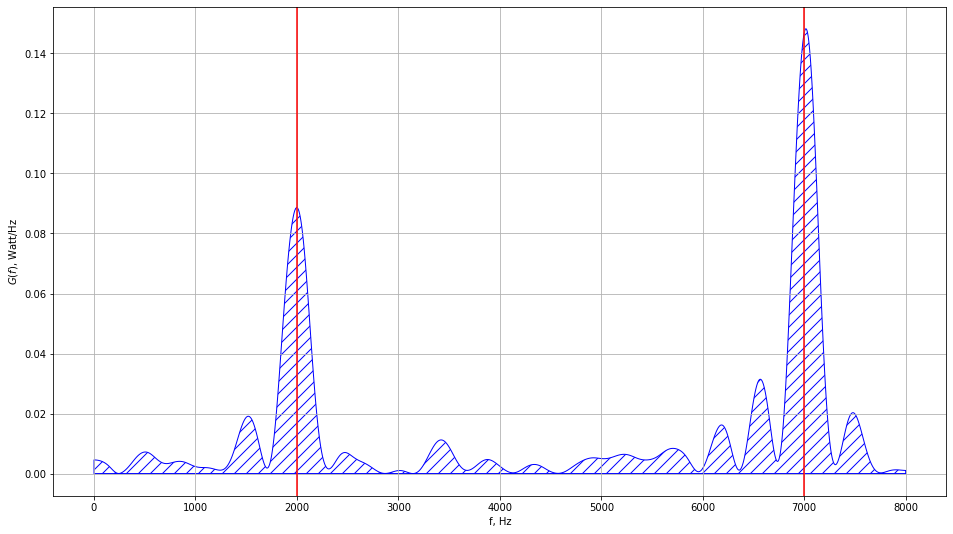

In [21]:
w=2*np.pi*np.linspace(fs/2**14, fs/2, 2**12)
pgram = signal.lombscargle(t, x, w, normalize=True)
plt.figure(figsize=(16, 9))
plt.fill_between(w/(2*np.pi), pgram, facecolor='white', edgecolor='blue', hatch = '//')
plt.axvline(2000, color='red')
plt.axvline(7000, color='red')
plt.xlabel('f, Hz')
plt.ylabel('$G(f)$, Watt/Hz')
plt.grid()
plt.show()